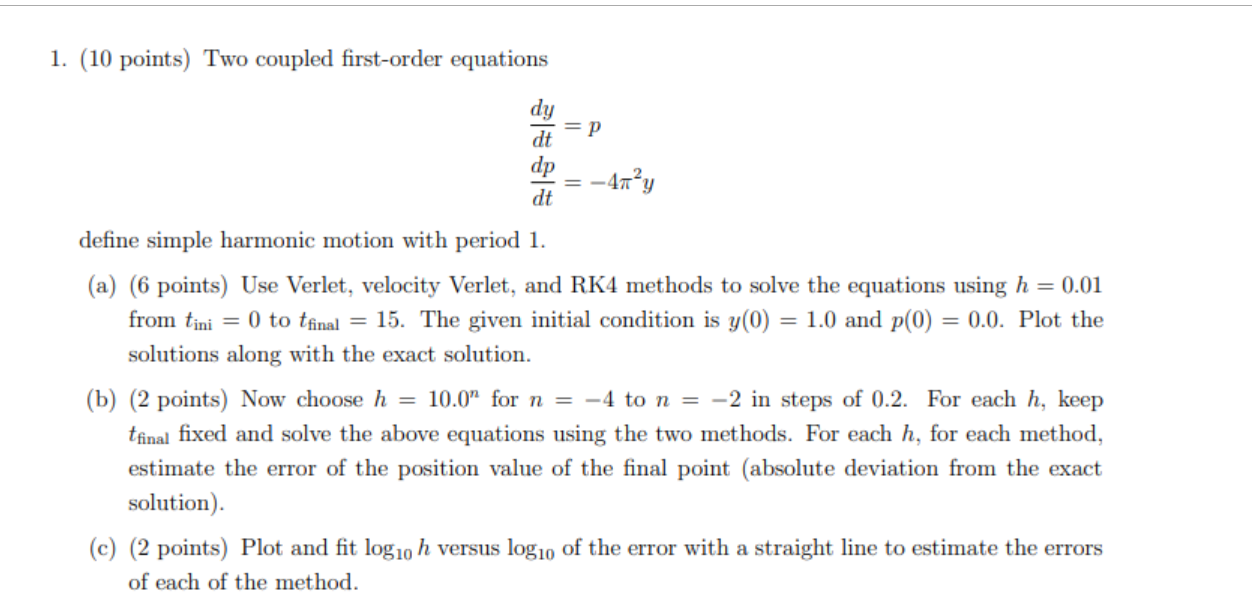

In [182]:
import numpy as np
def f(y):
    return np.array([y[1],-4*(np.pi**2)*y[0]])

a=np.arange(0.0,15.01,0.01)
h=0.01




def rkit(y_in,time_series,h,f):
    def rk4(f,h,y):
        ka=h*f(y)
        kb=h*f(y+ka/2)
        kc=h*f(y+kb/2)
        kd=h*f(y+kc)
        return y+(ka+2*kb+2*kc+kd)/6
    cory=np.zeros((len(time_series),2))
    cory[0]=y_in
    for i in range(len(a[1:])):
        cory[i+1]=rk4(f,h,cory[i])
    return cory
    

    
    





    

Text(0, 0.5, 'y')

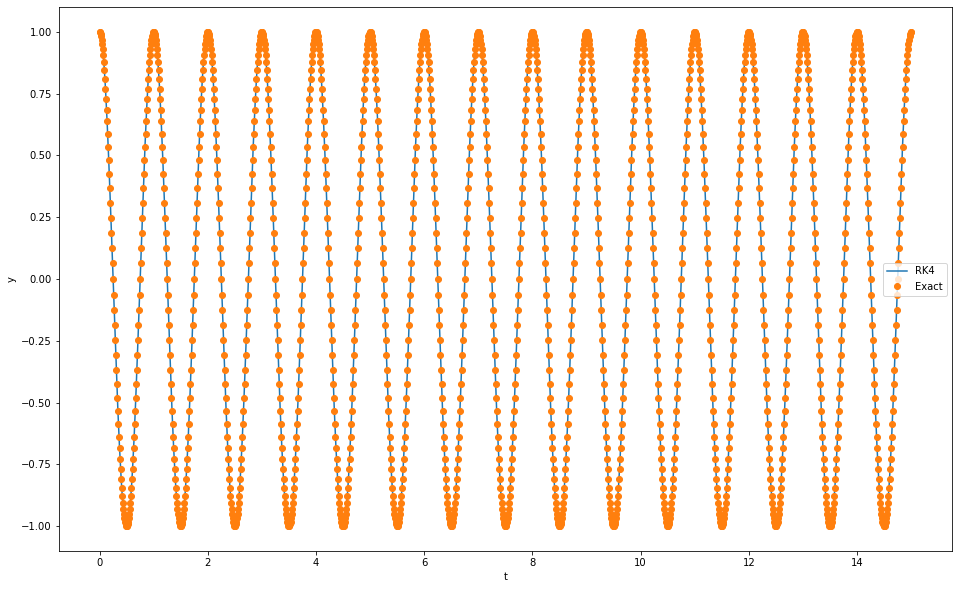

In [183]:
def exact(t):
    return np.cos(2*np.pi*t)
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plt.plot(a,rkit([1.0,0.0],a,0.01,f)[:,0], label="RK4")
plt.plot(a,exact(a),'o',label="Exact")
plt.legend()
plt.xlabel("t")
plt.ylabel("y")


In [184]:
def verlet(y_in,time_series,h,f):
    y=np.zeros((len(time_series),2))
    y[0]=y_in
    y[1][0]=y[0][0]+y[0][1]*h+0.5*(f(y[0])[1])*h*h
    for i in range(2,len(time_series)):
        y[i][0]=2*y[i-1][0]-y[i-2][0]+f(y[i-1])[1]*h*h
       
    return y

        
        
    

Text(0, 0.5, 'y')

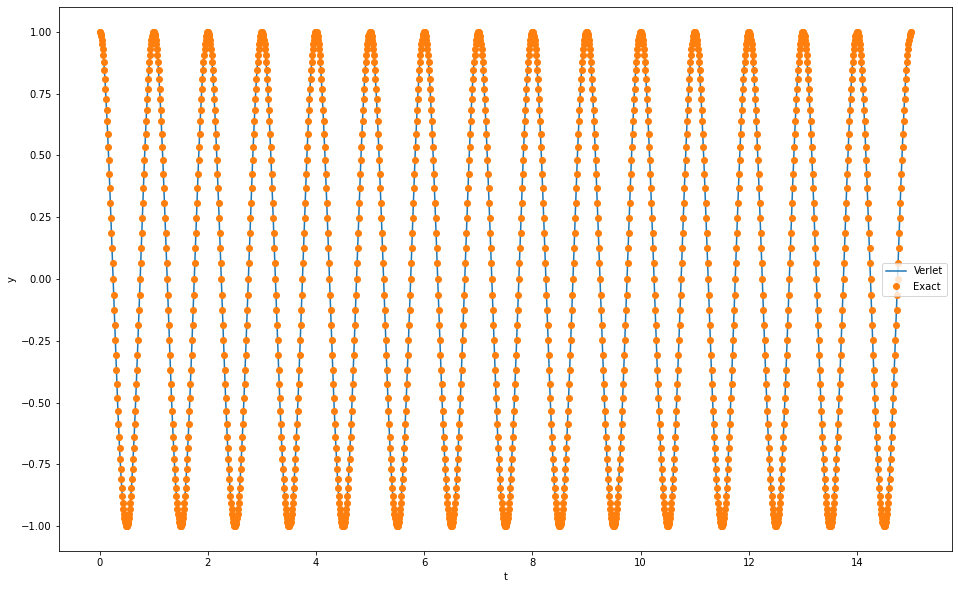

In [185]:
a=np.arange(0.0,15.01,0.01)
def exact(t):
    return np.cos(2*np.pi*t)
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plt.plot(a,verlet([1.0,0.0],a,0.01,f)[:,0], label="Verlet")
plt.plot(a,exact(a),'o',label="Exact")
plt.legend()
plt.xlabel("t")
plt.ylabel("y")

In [186]:
def velver(y_in,time_series,h,f):
    y=np.zeros((len(time_series),2))
    y[0]=y_in
    for i in range(len(time_series[1:])):
        y[i+1][0]=y[i][0]+y[i][1]*h+h*h*0.5*(f(y[i])[1])
        y[i+1][1]=y[i][1]+h*0.5*(f(y[i])[1]+f(y[i+1])[1])
        
        
       
    return y

        
    

Text(0, 0.5, 'y')

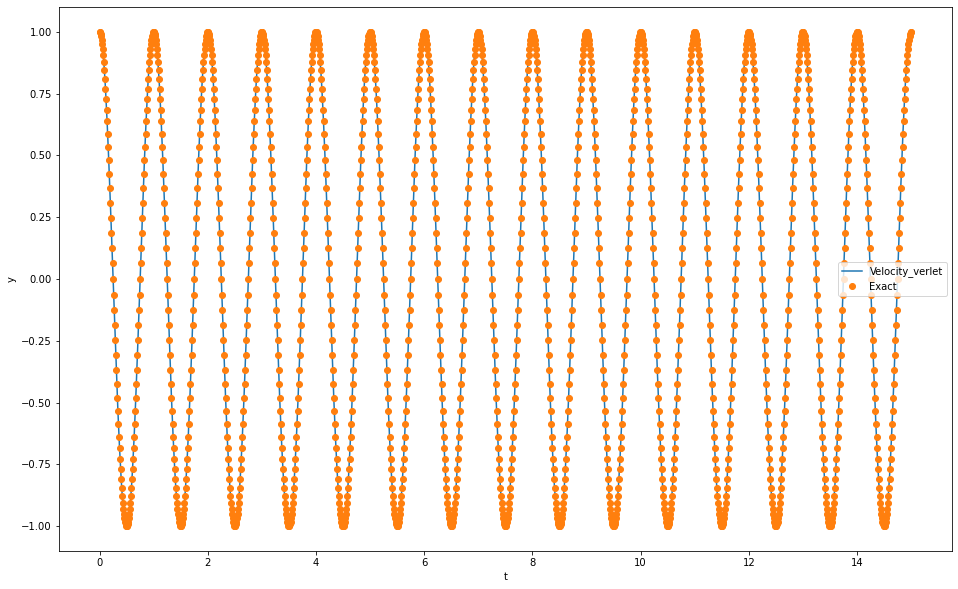

In [187]:
a=np.arange(0.0,15.01,0.01)
def exact(t):
    return np.cos(2*np.pi*t)
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plt.plot(a,velver([1.0,0.0],a,0.01,f)[:,0], label="Velocity_verlet")
plt.plot(a,exact(a),'o',label="Exact")
plt.legend()
plt.xlabel("t")
plt.ylabel("y")

In [188]:


c=np.arange(-4,-2,0.2)

rker=np.zeros(len(c))
verer=np.zeros(len(c))
velverer=np.zeros(len(c))
for i in range(len(c)):
    h=10**(c[i])
    a=np.arange(0,15+h,h)
    rker[i]=(abs(rkit([1.0,0.0],a,h,f)[-1][0]-1))
    
    verer[i]=(abs(verlet([1.0,0.0],a,h,f)[-1][0]-1))
    velverer[i]=(abs(velver([1.0,0.0],a,h,f)[-1][0]-1))
    

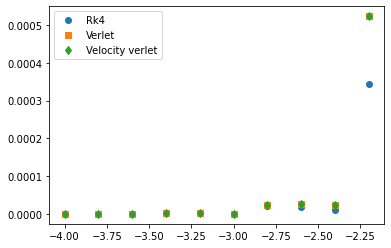

In [189]:
plt.plot(c,rker,'o',label="Rk4")
plt.plot(c,verer,'s',label="Verlet")
plt.plot(c,velverer,'d',label="Velocity verlet")
plt.legend()

Text(0, 0.5, 'Log10(h)')

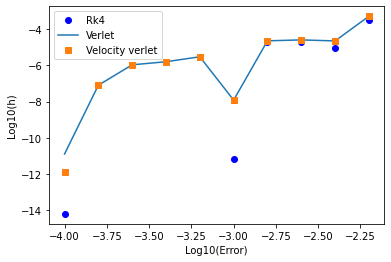

In [190]:
plt.plot(c,np.log10(rker),'o',color='blue',label="Rk4")
plt.plot(c,np.log10(verer),label="Verlet")
plt.plot(c,np.log10(velverer),'s',label="Velocity verlet")
plt.legend()
plt.xlabel("Log10(Error)")
plt.ylabel("Log10(h)")


C:\anaconda\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Text(0, 0.5, 'log(Error)')

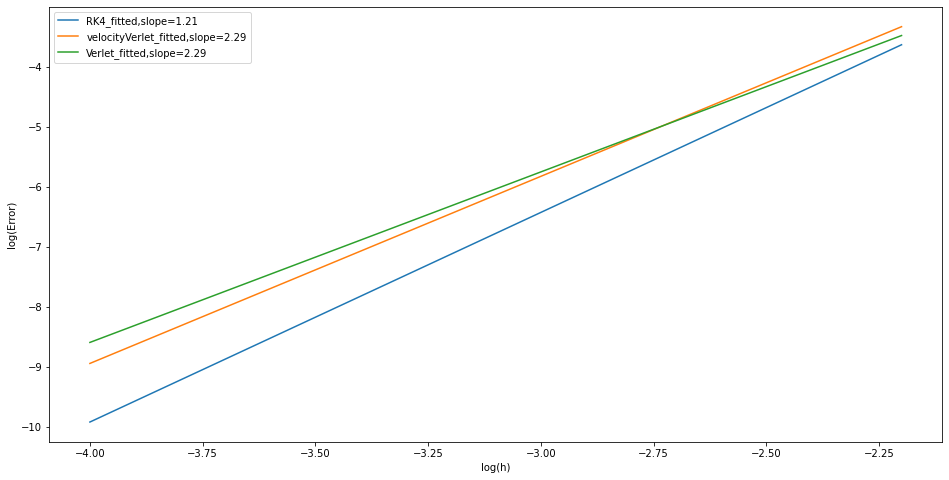

In [191]:
from scipy.optimize import curve_fit
def test(x, a, b):
    return a *x + b
plt.figure(figsize=(16,8))
sf,inf=curve_fit(test,c,np.log10(rker))[0][0],curve_fit(test, c, np.log10(rker))[0][1]
sb,info=curve_fit(test,c,np.log10(verer))[0][0],curve_fit(test, c,np.log10(verer))[0][1]
plt.plot(c,sf*c+inf*np.ones(len(c)),label="RK4_fitted,slope=1.21")

sc,infc=curve_fit(test,c,np.log10(velverer))[0][0],curve_fit(test, c,np.log10(velverer))[0][1]



plt.plot(c,sc*c+infc*np.ones(len(c)),label="velocityVerlet_fitted,slope=2.29")

plt.plot(c,sb*c+info*np.ones(len(c)),label="Verlet_fitted,slope=2.29")
plt.legend()
plt.xlabel("log(h)")
plt.ylabel("log(Error)")

In [192]:
print("The Slope of the RK4 method=",sf)
print("The slope of the velocity method is=",sb)
print("The slope of the Velocity verlet method is =",sc)

The Slope of the RK4 method= 3.489712239818697
The slope of the velocity method is= 2.8386114033191534
The slope of the Velocity verlet method is = 3.114750005779629


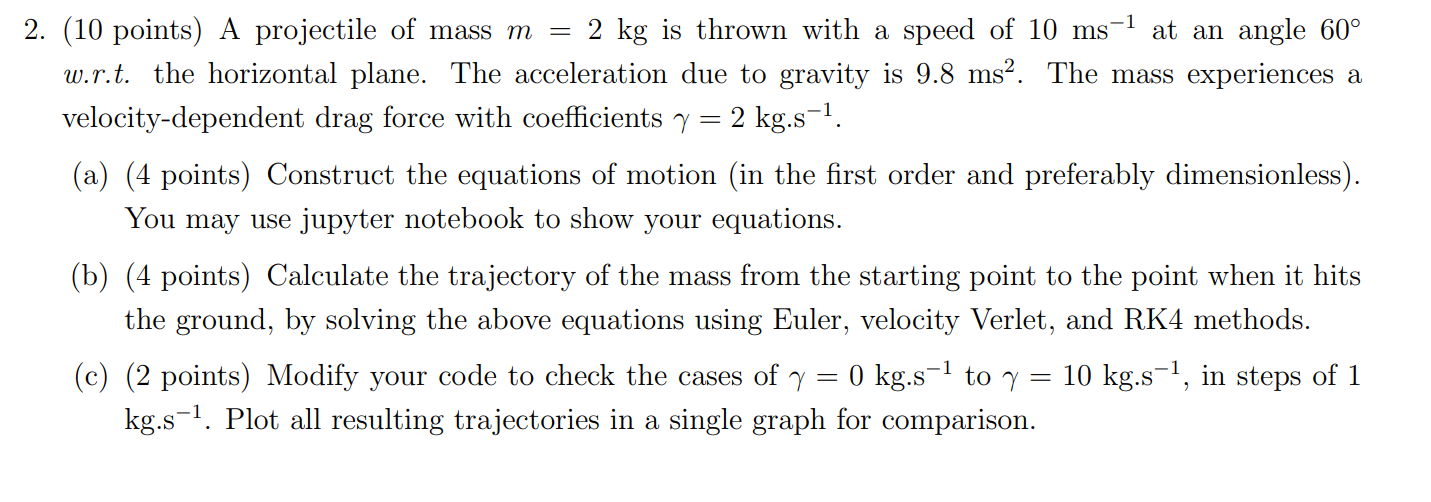

The decomposition of velocity is folllowed such:

$$v_{x}=vcos\theta \\
v_y=vsin\theta$$

As previous , we can first write the velocity as a new variable to make the newton's law (which involves 2nd order differential equation) to 1st order coupled differential equation.

$\dot x=v_x \\$
$\dot y=v_y$


$\dot v_x=-\frac{\gamma}{m}\:v_x \\$
$\dot v_y=-\frac{\gamma}{m}v_y - g$



In [193]:
import numpy as np
import matplotlib.pyplot as plt

In [194]:
def eulerit(y_in,time_series,h,f):
    y=np.zeros((len(time_series),4))
    y[0]=y_in
    for i in range(len(time_series[1:])):
        y[i+1]=y[i]+h*f(y[i])
    return y
        
    


In [195]:
def rkit(y_in,time_series,h,f):
    def rk4(f,h,y):
        ka=h*f(y)
        kb=h*f(y+ka/2)
        kc=h*f(y+kb/2)
        kd=h*f(y+kc)
        return y+(ka+2*kb+2*kc+kd)/6
    cory=np.zeros((len(time_series),4))
    cory[0]=y_in
    for i in range(len(time_series[1:])):
        cory[i+1]=rk4(f,h,cory[i])
    return cory
    


In [196]:
def velver(y_in,time_series,h,f):
    y=np.zeros((len(time_series),4))
    y[0]=y_in
    for i in range(len(time_series[1:])):
        y[i+1][0]=y[i][0]+y[i][1]*h+h*h*0.5*(f(y[i])[1])
        y[i+1][1]=(y[i][1]+h*0.5*f(y[i])[1])/(1+h/2)
        y[i+1][2]=y[i][2]+y[i][3]*h+h*h*0.5*(f(y[i])[3])
        y[i+1][3]=(y[i][3]+h*0.5*(f(y[i])[3])-4.9*h)/(1+h/2)
        
        
        
       
    return y


In [197]:
def dynamics(y):
    return np.array([y[1],-y[1],y[3],-y[3]-9.8])


In [198]:
y_in=[0,5,0,5*(np.sqrt(3))]#x,v_x,y,v_y format
t=np.arange(0.0,1.5,0.05)

In [199]:
trajectory=eulerit(y_in,t,0.05,dynamics)
tracrk=rkit(y_in,t,0.05,dynamics)
tracvelver=velver(y_in,t,0.05,dynamics)

Text(0, 0.5, 'Y axis')

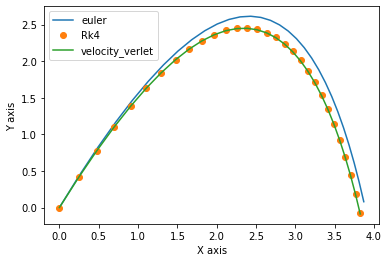

In [200]:
plt.plot(trajectory[:,0],trajectory[:,2],label="euler")
plt.plot(tracrk[:,0],tracrk[:,2],'o',label="Rk4")
plt.plot(tracvelver[:,0],tracvelver[:,2],label="velocity_verlet")
plt.legend()
plt.xlabel("X axis")
plt.ylabel("Y axis")

# Q2b

For this problem We need efficient computation of the time period for different values of gamma, hence let's first programme that.For that we have to fix the time step , let's fix it to 0.02. We first will take our 

In [201]:
def timeeu(f,y_in,gamma,h):
    y=[]
    y.append(np.array(y_in))
    y.append(y[0]+h*f(y[0]))
    i=1
    while y[i][2]*y[i-1][2]>=0:
        y.append(y[i]+h*f(y[i]))
        i=i+1
    return (i-1)*h

    
    

    

In [202]:
def timerk4(f,y_in,gamma,h):
    def rk4(f,h,y):
        ka=h*f(y)
        kb=h*f(y+ka/2)
        kc=h*f(y+kb/2)
        kd=h*f(y+kc)
        return y+(ka+2*kb+2*kc+kd)/6
    cory=[]
    cory.append(np.array(y_in))
    cory.append(rk4(f,h,cory[0]))
    i=1
    while cory[i][2]*cory[i-1][2]>=0 :
        cory.append(rk4(f,h,cory[i]))
        i=i+1
    return i*h
    

In [203]:
print("The time of flight acc to the RK4 method for 2a) is  =",timerk4(dynamics,y_in,2,0.05))

The time of flight acc to the RK4 method for 2a) is  = 1.4500000000000002


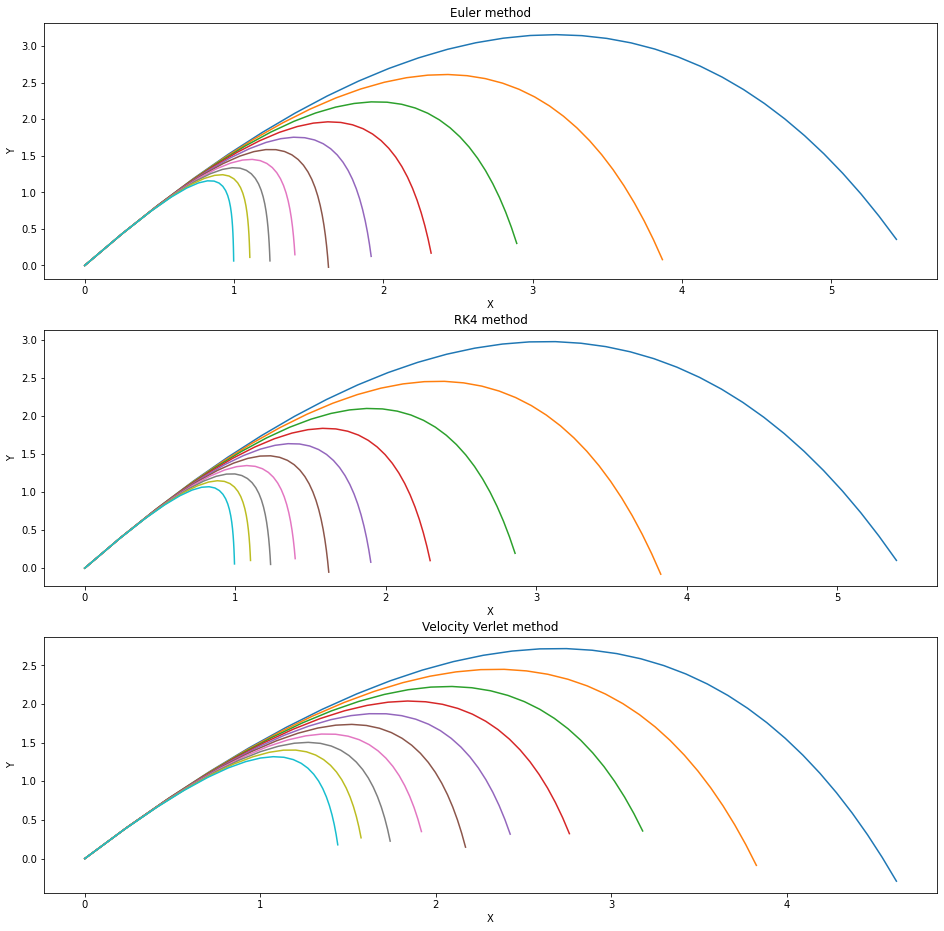

In [204]:
plt.figure(figsize=(16,16))
for i in range(1,11):
    def dyn(y):
        return np.array([y[1],-(i/2)*y[1],y[3],-(i/2)*y[3]-9.8])
    y_in=[0,5,0,5*(np.sqrt(3))]  #x,v_x,y,v_y format
    t_fin=timerk4(dyn,y_in,i,0.05)
    time=np.arange(0,t_fin,0.05)
    trajectory=eulerit(y_in,time,0.05,dyn)
    tracrk=rkit(y_in,time,0.05,dyn)
    tracvelver=velver(y_in,time,0.05,dyn)
    plt.subplot(3, 1, 1)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Euler method")
    plt.plot(trajectory[:,0],trajectory[:,2],label=f"Gamma={i}")
    
    plt.subplot(3,1,2)
    plt.plot(tracrk[:,0],tracrk[:,2],label=f"Gamma={i}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("RK4 method")
    plt.subplot(3,1,3)
    
    plt.plot(tracvelver[:,0],tracvelver[:,2],label=f"Gamma={i}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Velocity Verlet method")
    


